In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#اعمال فیلتر

In [ ]:
#تابع نمایش تصویر
def show(img):
  cv2_imshow(img)
#ماتریس های عکس رو میریزیم توی ایمیج به اصتلاح عکس رو میخونیم
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/2.jpg")
#برای اینکه محساباتمون راحت تر بشه تبدیل به سیاه سفید میکنیم ولی اگر به عکس رنگی نیاز داریم اینکارو نمیکنیم
gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# show(gray)
# cv2.waitKey(0)
# cv2.imwrite("gray.jpg",gray)


#lowpass filter   (فیلتری که نرم میکرد (تار

lowpass_kernel= np.ones((5,5),np.float32) /25   #-> یک بیستو پنچم چون پنجه اگه سه در سه بود تقسیم بر 9 میکردیم

#معمولا ابعاد فیلتر رو فرد در نظر میگیریم چون وسط داره اگرم زوج باشه فرقی نداره میانگین دو عضو وسط عدد وسطه

#اعمال فیلتر      #matris      kernel(filter)
lowpass= cv2.filter2D(gray,-1,lowpass_kernel)
# show(lowpass)
# cv2.waitKey(0)
# cv2.imwrite("lowpass.jpg",lowpass)

#استخراج لبه با استفاده از فیلترینگ
#edg filter - sobel       #یجورایی اختلاف پیکسل همایسه رو میده ربط داره به بحث مشتق این لبه رو میده
kernel_x= np.array([[1,0,-1],[2,0,-2],[1,0,-1]])        #لبه یابی در جهت افقی
kernel_y= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])        #لبه یتبی در جهت عمودی
edg_x= cv2.filter2D(gray,-1,kernel_x)                  #هرجهت ماتریس خودشو داره
edg_y= cv2.filter2D(gray,-1,kernel_y)

# show(edg_x)
# show(edg_y)
# cv2.waitKey(0)
# cv2.imwrite("efg_x.jpg",edg_x)
# cv2.imwrite("efg_y.jpg",edg_y)

#high pass (افزایش وضوح) abs=قدرمطلق         #unsine int (تایپ اعداد داخل ماتریس)
highpass= np.abs(gray.astype("float") - lowpass.astype("float")).astype("uint8")
                    #ماتریس خود عکس منهای ماتریس نرم شده اش
# show(highpass)
# cv2.waitKey(0)
cv2.imwrite("highpass.jpg",highpass)


True

در واقع این وضوح تصویر شاید خیلی کار امد نباشه و شبیه لبه یابی باشه ولی این روشی بود که توش پیکسل هاش با فرکانس بالاتر میموندن

#تبدیلات هندسی

In [ ]:
import cv2
import numpy as np

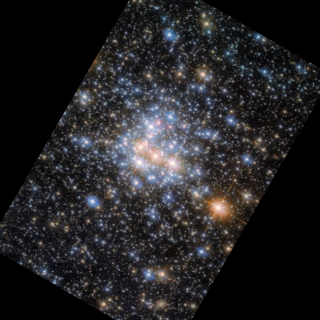

In [ ]:
scale=0.5
              #درجه
def rotation(degree):
  #ماتریس انتقال                        #tol - arz / 2
  T=np.float32([[1,0,0],[0,1,(img_org.shape[1]- img_org.shape[0])/2]])
  #اعمال             vorodi    matris   abaad
  result=cv2.warpAffine(img_org,T,tuple(img.shape[0:2]))
  cv2.imwrite("img_t.jpg",result)

  #ماتریس دوران               noghte davaran      darage   scale = 1
  M=cv2.getRotationMatrix2D((max_dim/2,max_dim/2),degree, scale=1)
  rotate= cv2.warpAffine(result,M,tuple(img.shape[0:2]))
  cv2.imwrite("rotate.jpg",rotate)

  cv2_imshow(rotate)
  cv2.waitKey(0)


img_org= cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/space.jpg")
                              #بزرگ نمایی در راستای ایکس و وای
img_org= cv2.resize(img_org,(0,0),fx=scale,fy=scale)

max_dim= np.max(img_org.shape[0:2])                   #بزرگ ترین بعد (عدد) رو میده
img=cv2.resize(img_org,(max_dim,max_dim))

rotation(60)


برای اینکه بتونیم تصویر رو بچرخونیم باید عکس رو بزرگتر کنیم تا چیزی از دست نره و به حاشیش صفر اضافه کنیم و چون اینجا مربعی نیست اول میاییم به ضلع کوکتر انقد اضافه میکنیم تا مساوی بشه بعد تصویر رو میبریم مرکز

اگر حاشیه رو بیشتر کنیم دیگه اون گوشه ها از بین نمیره

#استخراج پس زمینه و استراخ اشیای متحرکت از ویدیو

##median(مدین)

In [ ]:
import cv2
import numpy as np


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/data/video.mp4"

#background detection
      #خوندن ویدیو
capture=cv2.VideoCapture(cv2.samples.findFileOrKeep(path))
#در واقع یک ابجکت میده که فریم به فریمشو میشه دسترسی داشت

#لیستی از فریم ها (عکس ها)
bg=[]
#متغییر اول نشون میده که خوندن فریم به درستی انجام شده یا نه دومی هم ماتریس فریمه (همون عکسه فریم

while True:
  ret,frame=capture.read()

  if frame is None:
    break

  bg.append(frame)

#تبدیل به ماتریس  (ویدیو چهاربعدیه
bg= np.array(bg)
#بدست اوردن میدین  axis=یعنی قراره عملیات میدین رو اون بعد اعمال شه
bg= np.median(bg,axis=0)
#برگردوندن به تایپ اعداد داخل ماتریس
bg= bg.astype("uint8")

# cv2.imwrite("background.jpg",bg)

#چون اون دستور کپچر داره دایما میخونه ویدیو رو باید بهش با این دستور بگیم دیگه اناجم نده و نخونه
capture.release()

دیگه توی میدین نیاز به اعمال فیلتر نبود و خود نامپای این کار رو انجام داد

دراورن اشیای متحرک

برای اینکار تک تک فریم های ویدیو رو از فریمی که از میدین در اومده تفریق میکردیم

In [ ]:
capture=cv2.VideoCapture(cv2.samples.findFileOrKeep(path))

while True:
  ret,frame=capture.read()
    #معمولا خوبه برای عملیات ریاضی از فلوت استفاده کنیم تا محاسباتمون دقیق باشه
  mymask=np.abs(frame.astype("float") - bg.astype("float"))
  mymask= mymask.astype("uint8")


frame= cv2.resize(frame,(0,0), fx=0.5 , fy= 0.5)
mymask= cv2.resize(mymask,(0,0), fx=0.5 , fy= 0.5)

cv2_imshow(mymask)
cv2_imshow(frame)
cv2.waitkey(1)

AttributeError: 'NoneType' object has no attribute 'astype'

#تشخیص چهره

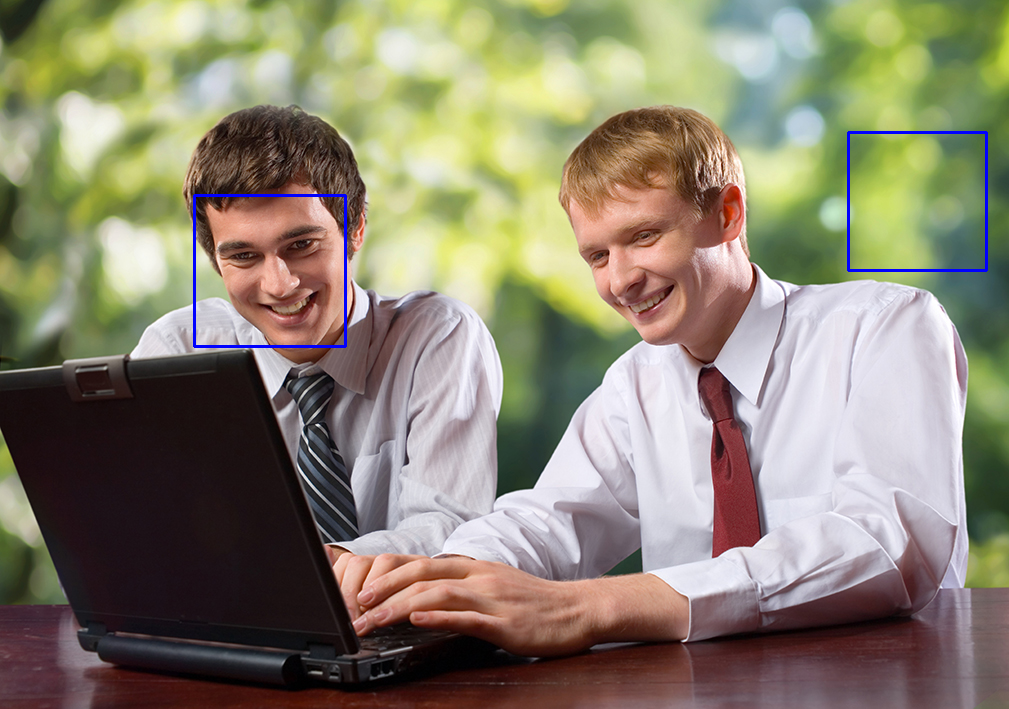

In [ ]:
import cv2

# load the cascade
            #یک مدل ماشین لرنینگ در اوپن سی وی
face_cascade= cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/data/haarcascade_frontalface_default.xml")
#فایل ایکس ام ال که مدل یادگرفته شده توش وجود داره

#یک ابجکتی بهمون میده که میتونیم با توابعش که اعمال میکنیم چهره رو تشخیص بدیم

#Read the input image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/test.jpg")

#convert into grayscale
#این مدل روی تصاویر سیاه و سفید اموزش دیده پس سیاه سفیدش میکنیم
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Detect faces
#پیدا کردن صورت
faces= face_cascade.detectMultiScale(gray,1.1,4)

#Draw rectangle around the faces
for x , y , w , h in faces:
  cv2.rectangle(img,(x,y),(x+w , y+h),(255,0,0),2)

#به ازای هر تصویر چهار نقطه داریم مختصات ایکس و وای و طول و عرض

#Display the output
cv2_imshow(img)
cv2_waitKey()

#تشخیص چهره روی ویدیو (وبکم)

In [ ]:
import cv2


# load the cascade
face_cascade= cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/data/haarcascade_frontalface_default.xml")

#To capture video from webcam
capture= cv2.VideoCapture(0)
#برای استفاده از وبکم میزنیم 0

#همون مراحله فقط چون تو ویدیوعه میندازیم توی حلقه وایل
while True:
  #read the frame
  ret,img=capture.read()

  #convert to grayscale
  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  #Detect the faces
  faces= face_cascade.detectMultiScale(gray,1.1,4)

  #Draw rectangle around each faces
  for x , y , w , h in faces:
    cv2.rectangle(img,(x,y),(x+w , y+h),(255,0,0),2)

  #Display
  cv2_imshow(img)
  k= cv2.waitKey(30)

#release the videocapture object
cap.release()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


##train